In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 13s 34ms/step - loss: 0.4551 - accuracy: 0.7725 - val_loss: 0.3079 - val_accuracy: 0.8785
Epoch 2/10
391/391 [==============================] - 10s 24ms/step - loss: 0.2239 - accuracy: 0.9190 - val_loss: 0.2951 - val_accuracy: 0.8805
Epoch 3/10
391/391 [==============================] - 9s 23ms/step - loss: 0.1717 - accuracy: 0.9382 - val_loss: 0.3210 - val_accuracy: 0.8749
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 0.1372 - accuracy: 0.9511 - val_loss: 0.3694 - val_accuracy: 0.8693
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 0.1097 - accuracy: 0.9618 - val_loss: 0.4099 - val_accuracy: 0.8641
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0896 - accuracy: 0.9699 - val_loss: 0.5085 - val_accuracy: 0.8595
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0714 - accuracy: 0.9769 - val_loss: 0.6123 - val_accuracy: 0.85

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

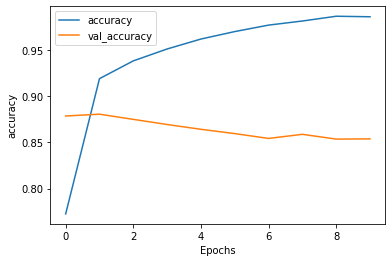

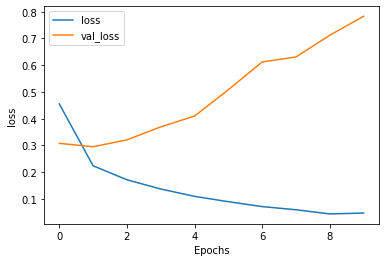

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [13]:
!git add .
!git commit -m "Saving file after training"
!git push

[master e01bf96] Saving file after training
 2 files changed, 273 insertions(+), 8 deletions(-)
 create mode 100644 deeplearning.ai-tensorflow-developer-certificate/3-of-4-nlp-in-tf/week-3/cnn-text-classifier.ipynb
Counting objects: 7, done.
Delta compression using up to 32 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 25.94 KiB | 12.97 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To github.com:arjun921/DeepLearning-Journal.git
   04f482e..e01bf96  master -> master
